In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [2]:
shifts = {
    'EXT_DECAM': 50.,
    '': 5.,
    'EXT_OMEGACAM': -20.,
    'EXT_LSST': -50.,
    'EXT_JPCAM': 100.,
    'EXT_MEGACAM': -80,
    'EXT_PANSTARRS': -100,
    'EXT_HSC': 80
}
config = dict()
exec(open('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/data/Nnpz-12Jul2021-111557.conf').read(), config)
ref_bands = config['reference_sample_phot_filters']

In [8]:
reference = Table.read('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/ProductionInputEcdmHandler/reference_sample_dir.dir/phot.fits', hdu=1)
shiftedd = Table.read('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/PhotoShiftedWithCorr.fits', hdu=1)
shiftedu = Table.read('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/PhotoShiftedWithCorrUnion.fits', hdu=1)

reference.sort('ID')
shiftedd.sort('ID')
shiftedu.sort('ID')

In [9]:
idx = np.random.choice(len(reference), 1000, replace=False)
reference = reference[idx]
shiftedd = shiftedd[idx]
shiftedu = shiftedu[idx]
assert((reference['ID'] == shiftedd['ID']).all())
assert((reference['ID'] == shiftedu['ID']).all())

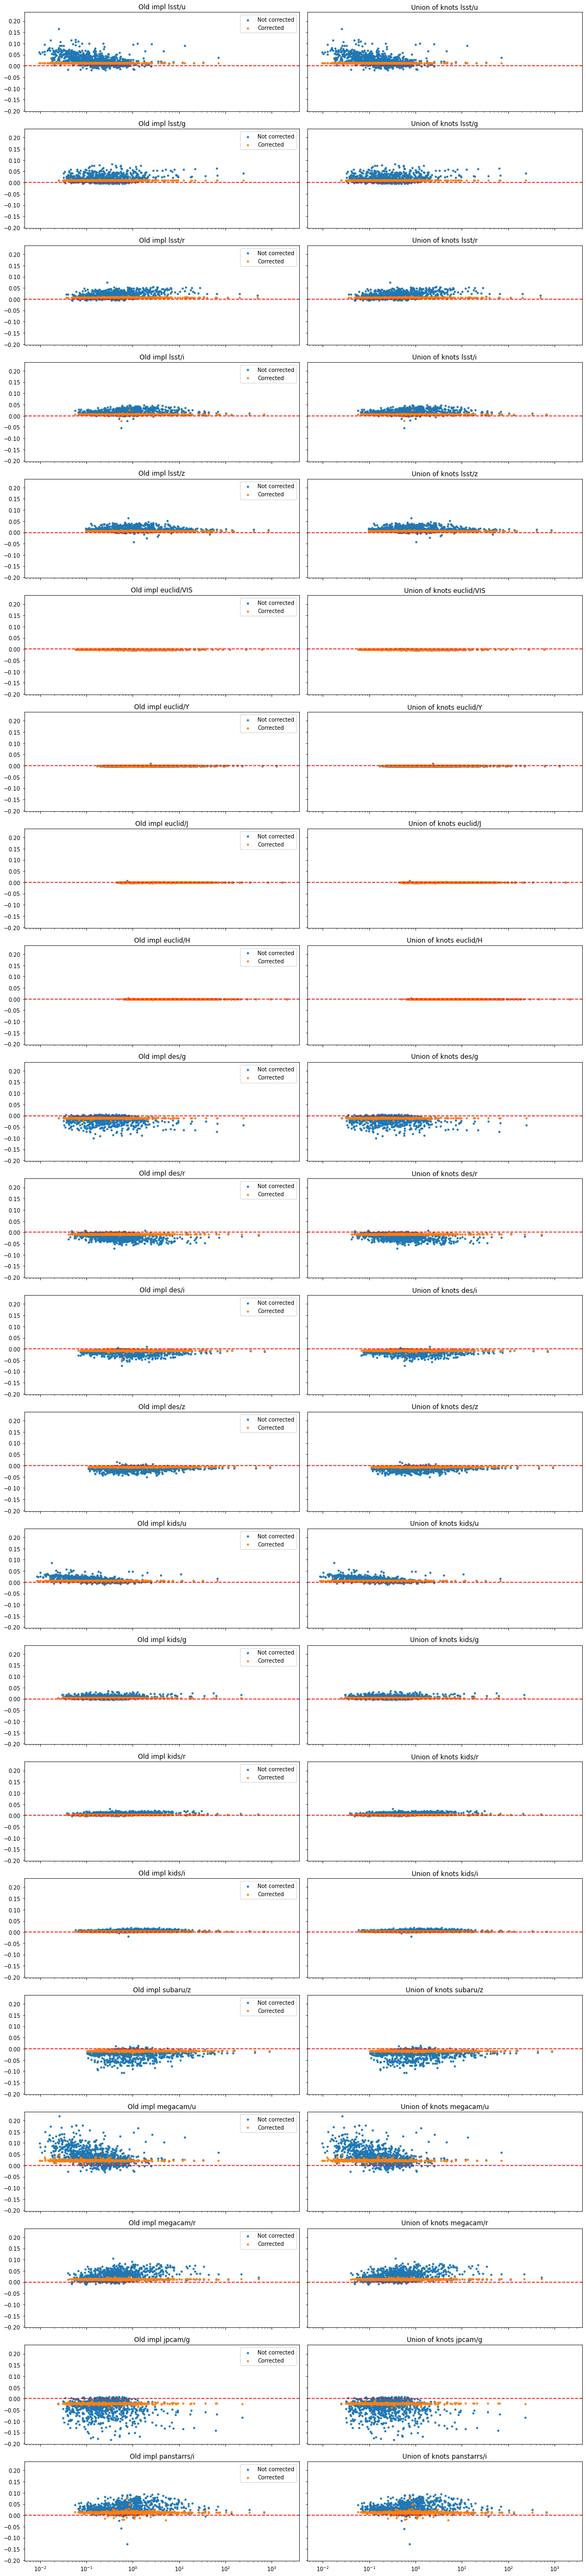

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=len(ref_bands), sharex=True, sharey=True, figsize=(15,3*len(ref_bands)))

for i, b in enumerate(ref_bands):
    if b.startswith('euclid/'):
        bname = ''
    else:
        bname = b.split('/')
        if bname[0] == 'des':
            bname[0] = 'decam'
        elif bname[0] == 'kids':
            bname[0] = 'omegacam'
        elif bname[0] == 'subaru':
            bname[0] = 'hsc'
        bname = f'EXT_{bname[0]}'.upper()
    s = -shifts[bname]
    
    zp = shiftedd[b]
    c =  s * s * shiftedd[f'{b}_SHIFT_CORR'][:,0] + s * shiftedd[f'{b}_SHIFT_CORR'][:,1] + 1

    axes[i, 0].scatter(reference[b], (reference[b]-zp)/reference[b], marker='.', label='Not corrected')
    axes[i, 0].scatter(reference[b], (reference[b]-c*zp)/reference[b], marker='.', label='Corrected')
    axes[i, 0].set_title(f'Old impl {b}')
    axes[i, 0].axhline(0, linestyle='--', color='red')

    zp = shiftedu[b]
    c =  s * s * shiftedu[f'{b}_SHIFT_CORR'][:,0] + s * shiftedu[f'{b}_SHIFT_CORR'][:,1] + 1
    axes[i, 1].scatter(reference[b], (reference[b]-zp)/reference[b], marker='.')
    axes[i, 1].scatter(reference[b], (reference[b]-c*zp)/reference[b], marker='.')
    axes[i, 1].set_title(f'Union of knots {b}')
    axes[i, 1].axhline(0, linestyle='--', color='red')

    axes[i, 0].set_xscale('log')
    axes[i, 0].legend()
    #axes[i, 0].set_ylim(-0.02, 0.02)
plt.tight_layout()